# Project 1: Part 2 (Pneumonia)

## Task 1: Exploratory Data Analysis
Below, a first analysis of the data is shown, whereby an imbalance between normal and infected samples was notices immediately. Especially the train split contains almost double the amount of infected samples compared to healthy samples.

### Analysis

<AxesSubplot: >

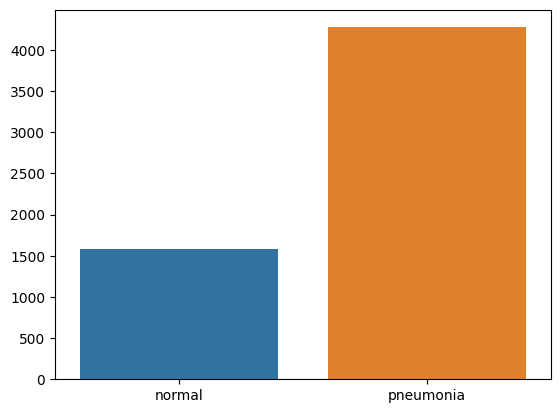

In [6]:
# import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# inspect the data
os.listdir('chest_xray/chest_xray')

# analyze number of images in each folder
train_normal = os.listdir('chest_xray/chest_xray/train/NORMAL')
train_pneumonia = os.listdir('chest_xray/chest_xray/train/PNEUMONIA')
test_normal = os.listdir('chest_xray/chest_xray/test/NORMAL')
test_pneumonia = os.listdir('chest_xray/chest_xray/test/PNEUMONIA')
val_normal = os.listdir('chest_xray/chest_xray/val/NORMAL')
val_pneumonia = os.listdir('chest_xray/chest_xray/val/PNEUMONIA')

# create a dataframe
df = pd.DataFrame({'train_normal': [len(train_normal)], 'train_pneumonia': [len(train_pneumonia)], 'test_normal': [len(test_normal)], 'test_pneumonia': [len(test_pneumonia)], 'val_normal': [len(val_normal)], 'val_pneumonia': [len(val_pneumonia)]})

# visualize normal vs pneumonia
normal = len(train_normal) + len(test_normal) +len(val_normal)
pneumonia = len(train_pneumonia) + len(test_pneumonia) + len(val_pneumonia)
df = pd.DataFrame({'normal': [normal], 'pneumonia': [pneumonia]})
sns.barplot(data=df)

### Preprocessing

In [7]:
import cv2
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [8]:
# load data
train = get_data('chest_xray/chest_xray/train')
test = get_data('chest_xray/chest_xray/test')
val = get_data('chest_xray/chest_xray/val')

OpenCV(4.7.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.7.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



/tmp/ipykernel_794812/2721523318.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


OpenCV(4.7.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.7.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



In [9]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

In [10]:
# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

In [11]:
# resize data for deep learning 
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [135]:
# data augmentation
from keras.preprocessing.image import ImageDataGenerator
data_generator = ImageDataGenerator(
    rotation_range=20,
    # grayscale
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

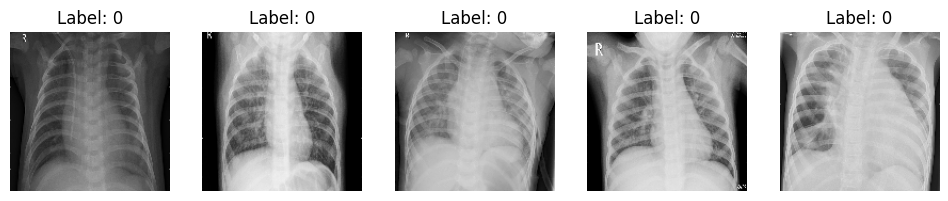

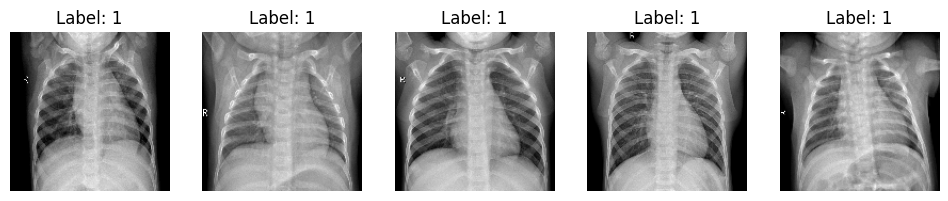

In [9]:
# visualize train data (5 normal)
plt.figure(figsize=(12, 12))
for i in range(5):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i].reshape(img_size, img_size), cmap='gray')
    plt.axis('off')
    plt.title('Label: {}'.format(y_train[i]))

# 5 pneumonia
plt.figure(figsize=(12, 12))
for i in range(5):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i+4000].reshape(img_size, img_size), cmap='gray')
    plt.axis('off')
    plt.title('Label: {}'.format(y_train[i+4000]))

## Task 2: Build CNN classifier

In [175]:
# build the CNN
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# create the model
pneumonia_clf = Sequential()
pneumonia_clf.add(Conv2D(32, (3, 3), input_shape = (150, 150, 1), activation = 'relu'))
pneumonia_clf.add(BatchNormalization())
pneumonia_clf.add(MaxPooling2D(pool_size = (2, 2)))
pneumonia_clf.add(Dropout(0.1))

pneumonia_clf.add(Conv2D(32, (3, 3), activation = 'relu'))
pneumonia_clf.add(BatchNormalization())
pneumonia_clf.add(MaxPooling2D(pool_size = (2, 2)))
pneumonia_clf.add(Dropout(0.2))

pneumonia_clf.add(Flatten())

pneumonia_clf.add(Dense(units = 32, activation = 'relu'))
pneumonia_clf.add(BatchNormalization())
pneumonia_clf.add(Dropout(0.2))

pneumonia_clf.add(Dense(units = 1, activation = 'sigmoid'))

# compile the model
pneumonia_clf.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# model summary
pneumonia_clf.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 148, 148, 32)      320       
                                                                 
 batch_normalization_20 (Bat  (None, 148, 148, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 dropout_20 (Dropout)        (None, 74, 74, 32)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 72, 72, 32)        9248      
                                                                 
 batch_normalization_21 (Bat  (None, 72, 72, 32)      

In [176]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')

In [177]:
# train the CNN
history = pneumonia_clf.fit_generator(data_generator.flow(x_train, y_train, batch_size=32),
                                        epochs=20, validation_data=(x_val, y_val),
                                        steps_per_epoch=x_train.shape[0] // 32,
                                        callbacks=[learning_rate_reduction, early_stopping])

Epoch 1/20


/tmp/ipykernel_794812/961660134.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = pneumonia_clf.fit_generator(data_generator.flow(x_train, y_train, batch_size=32),


163/163 [==============================] - 6s 32ms/step - loss: 0.4479 - accuracy: 0.8054 - val_loss: 12.9916 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/20
163/163 [==============================] - 5s 32ms/step - loss: 0.2677 - accuracy: 0.8911 - val_loss: 25.3677 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/20
163/163 [==============================] - 5s 31ms/step - loss: 0.2215 - accuracy: 0.9133 - val_loss: 1.8212 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/20
163/163 [==============================] - 5s 32ms/step - loss: 0.2165 - accuracy: 0.9107 - val_loss: 0.6029 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 5/20
163/163 [==============================] - 5s 32ms/step - loss: 0.1932 - accuracy: 0.9233 - val_loss: 4.4642 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 6/20
163/163 [==============================] - 5s 32ms/step - loss: 0.1950 - accuracy: 0.9227 - val_loss: 0.4541 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 7/20
163/163 [==============================] - 5s 32ms/step - loss

In [178]:
# inference on test set
pneumonia_clf.evaluate(x_test, y_test)

20/20 [==============================] - 0s 4ms/step - loss: 0.3280 - accuracy: 0.8654


[0.3279883861541748, 0.8653846383094788]

### Analysis of training

20/20 [==============================] - 0s 3ms/step


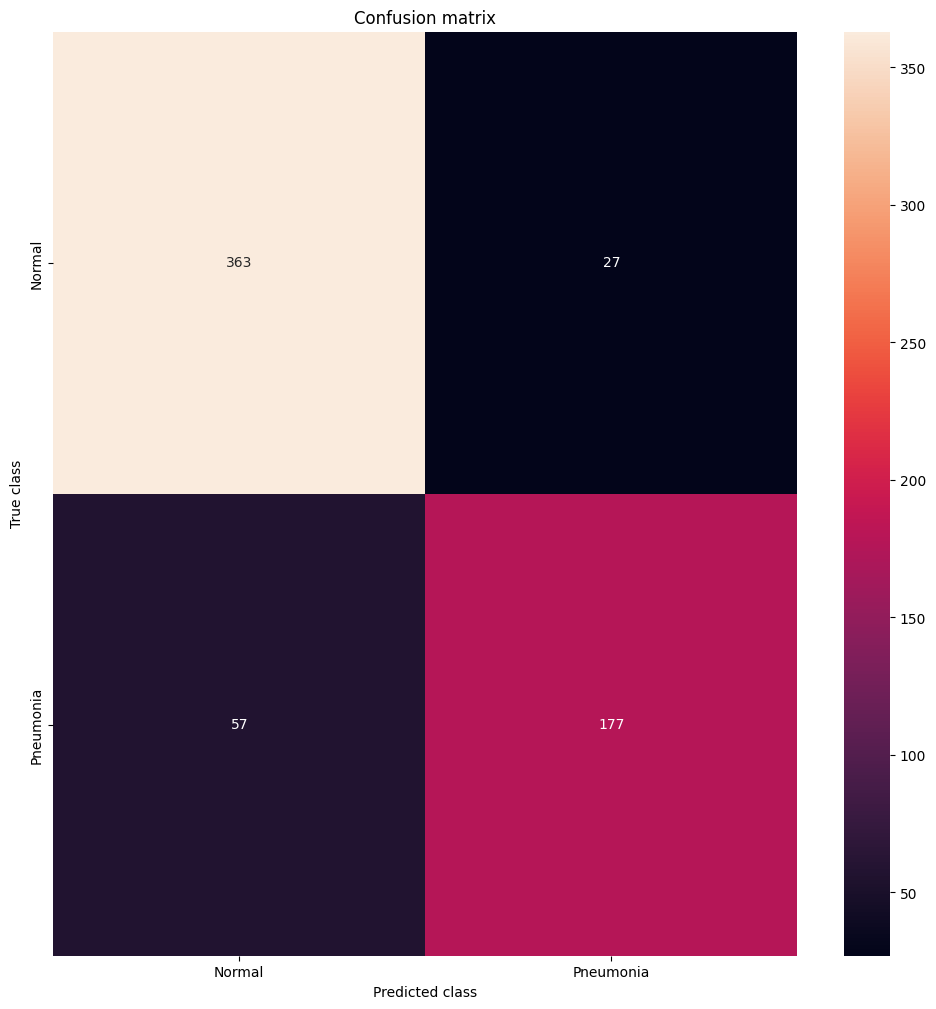

In [179]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = pneumonia_clf.predict(x_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1)

# axis labels
LABELS = ['Normal', 'Pneumonia']

# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

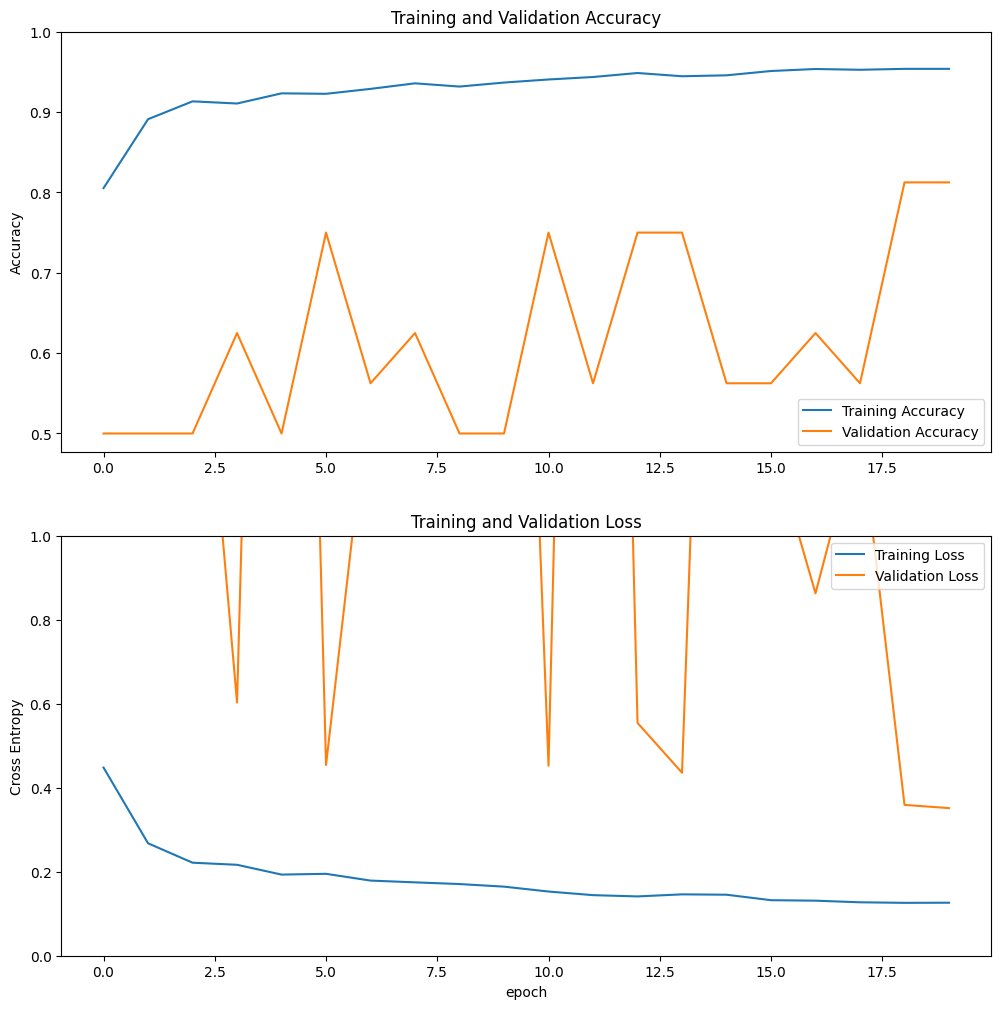

In [180]:
# analyze the training history
plt.figure(figsize=(12, 12))
plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

              precision    recall  f1-score   support

      Normal       0.86      0.93      0.90       390
   Pneumonia       0.87      0.76      0.81       234

    accuracy                           0.87       624
   macro avg       0.87      0.84      0.85       624
weighted avg       0.87      0.87      0.86       624



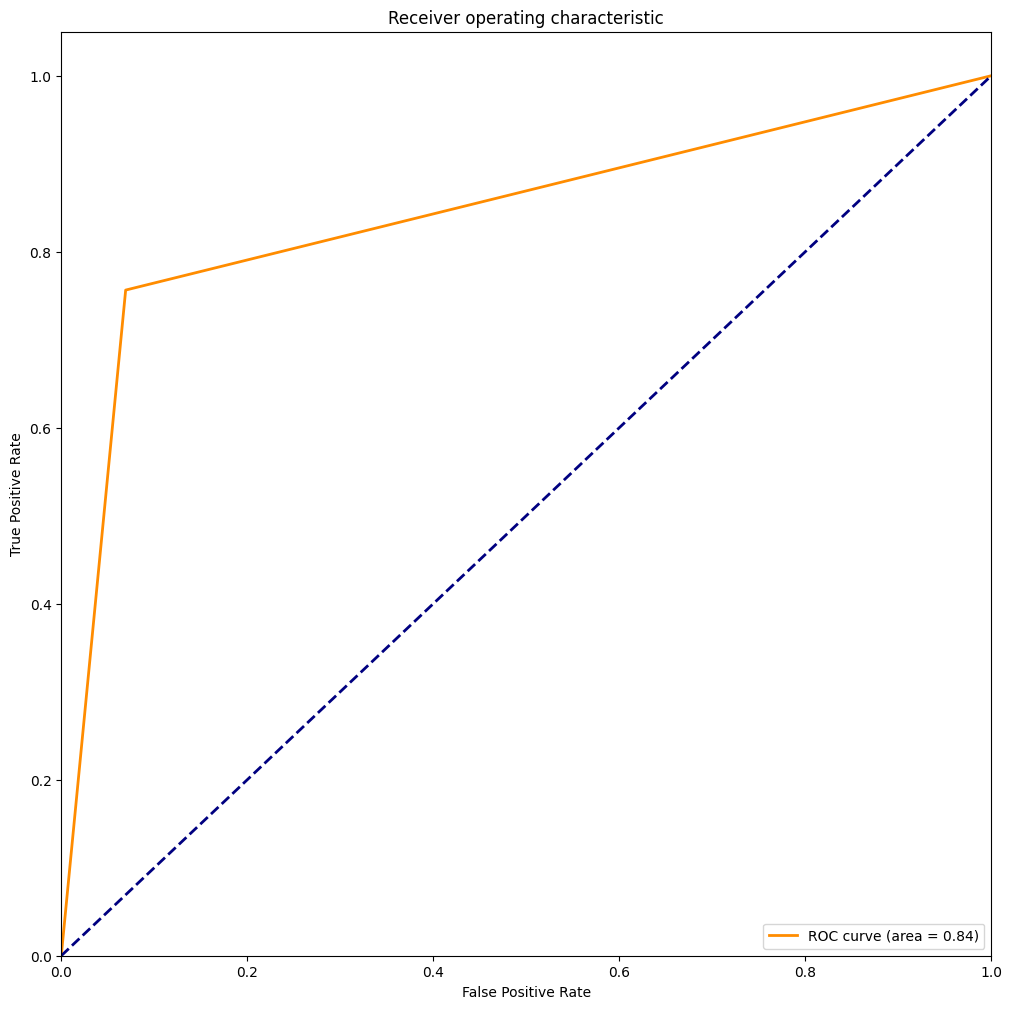

In [181]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=LABELS))

# ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12, 12))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [182]:
# predictions on test data
pred = pneumonia_clf.predict(x_test)
pred = np.round(pred)
pred = pred.astype(int)
pred = pred.reshape(-1)
pred[:10]

20/20 [==============================] - 0s 3ms/step


array([0, 0, 1, 0, 1, 0, 0, 1, 0, 0])

In [183]:
# compare correct and incorrect predictions
correct = np.nonzero(pred == y_test)[0]
incorrect = np.nonzero(pred != y_test)[0]

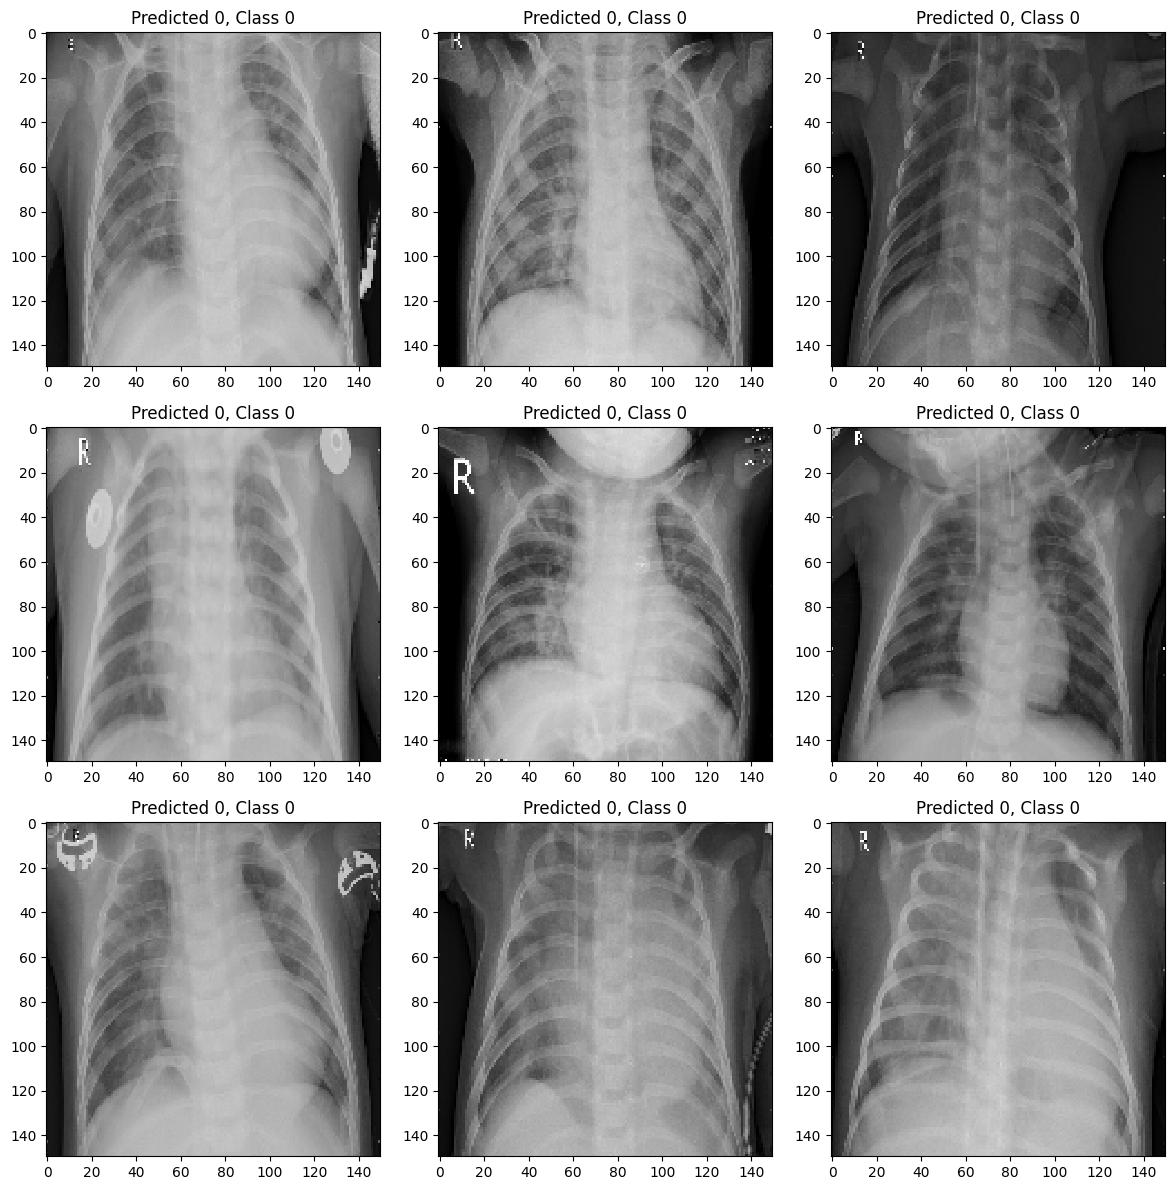

In [184]:
# visualize correct predictions
plt.figure(figsize=(12, 12))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_test[correct].reshape(img_size, img_size), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(pred[correct], y_test[correct]))
    plt.tight_layout()

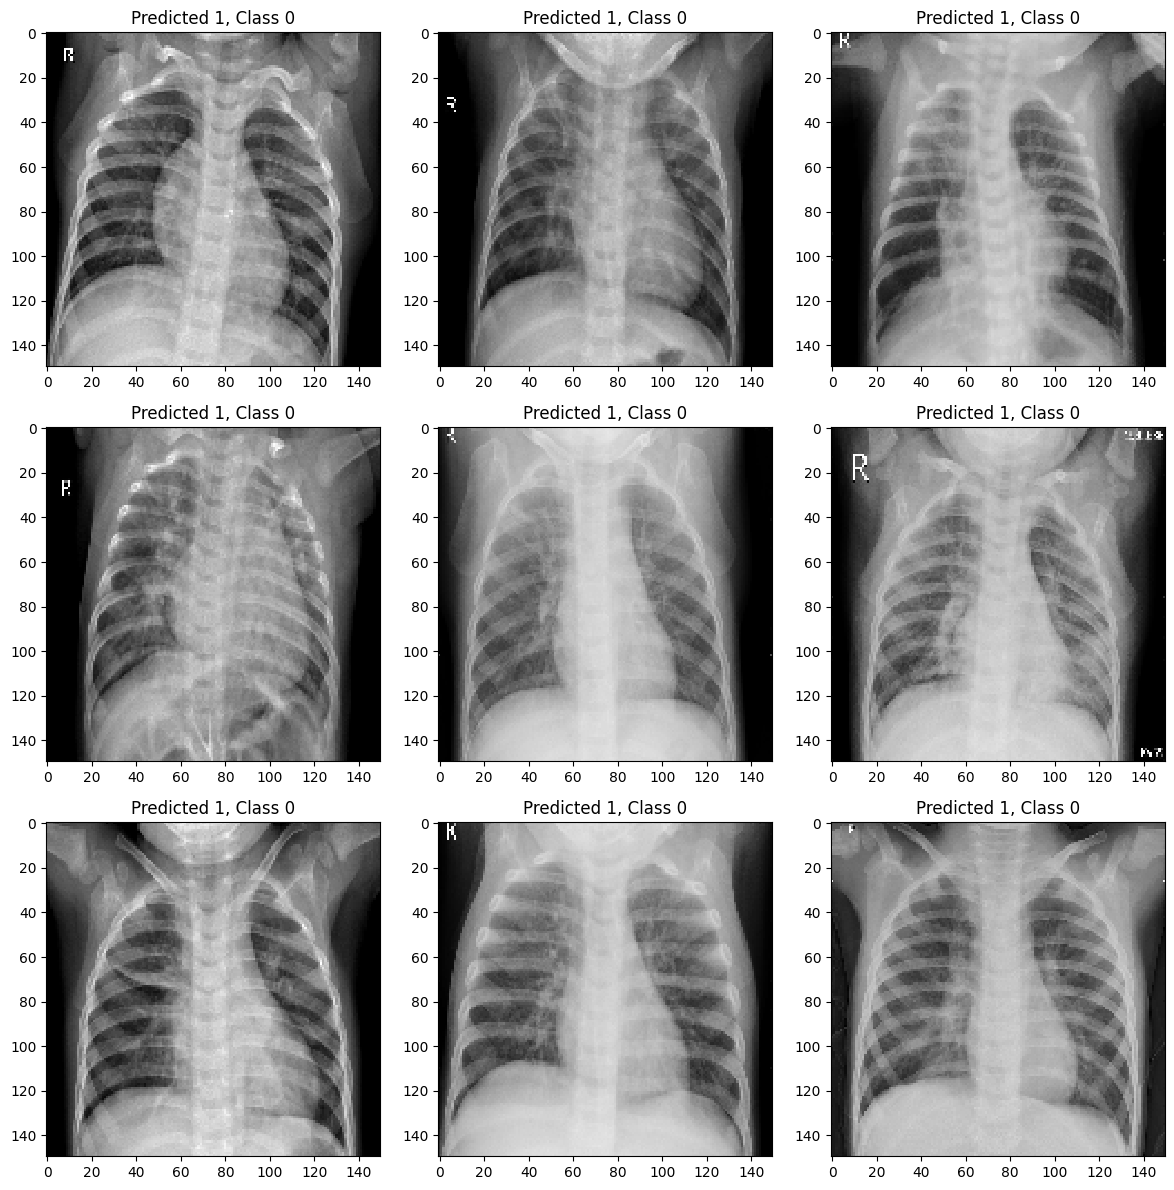

In [185]:
# visualize incorrect predictions
plt.figure(figsize=(12, 12))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_test[incorrect].reshape(img_size, img_size), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(pred[incorrect], y_test[incorrect]))
    plt.tight_layout()

In [186]:
# save the CNN
pneumonia_clf.save('models/pneumonia.h5')

## Task 3: Integrated Gradients

In [41]:
# load model
from keras.models import load_model
pneumonia_clf = load_model('models/pneumonia.h5')

In [187]:
# establish a baseline
import tensorflow as tf
baseline = tf.zeros(shape=(150, 150, 1))

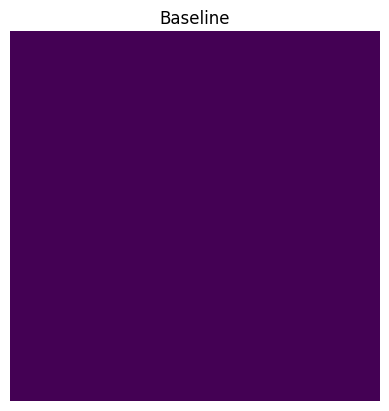

In [188]:
plt.imshow(baseline)
plt.title("Baseline")
plt.axis('off')
plt.show()

In [189]:
# generate linear interpolation
m_steps=50
alphas = tf.linspace(start=0.0, stop=1.0, num=m_steps+1) # Generate m_steps intervals for integral_approximation() below.

def interpolate_images(baseline,
                       image,
                       alphas):
  baseline = tf.cast(baseline, tf.float32)
  image = tf.cast(image, tf.float32)
  alphas_x = alphas[:, tf.newaxis, tf.newaxis, tf.newaxis]
  baseline_x = tf.expand_dims(baseline, axis=0)
  input_x = tf.expand_dims(image, axis=0)
  print("Baseline shape: ", baseline_x.shape)
  print("Image shape: ", input_x.shape)
  print("Alphas shape: ", alphas_x.shape)
  delta = input_x - baseline_x
  images = baseline_x +  alphas_x * delta
  return images

interpolated_img = interpolate_images(baseline=baseline,
                                        image=x_test[0],
                                        alphas=alphas)

Baseline shape:  (1, 150, 150, 1)
Image shape:  (1, 150, 150, 1)
Alphas shape:  (51, 1, 1, 1)


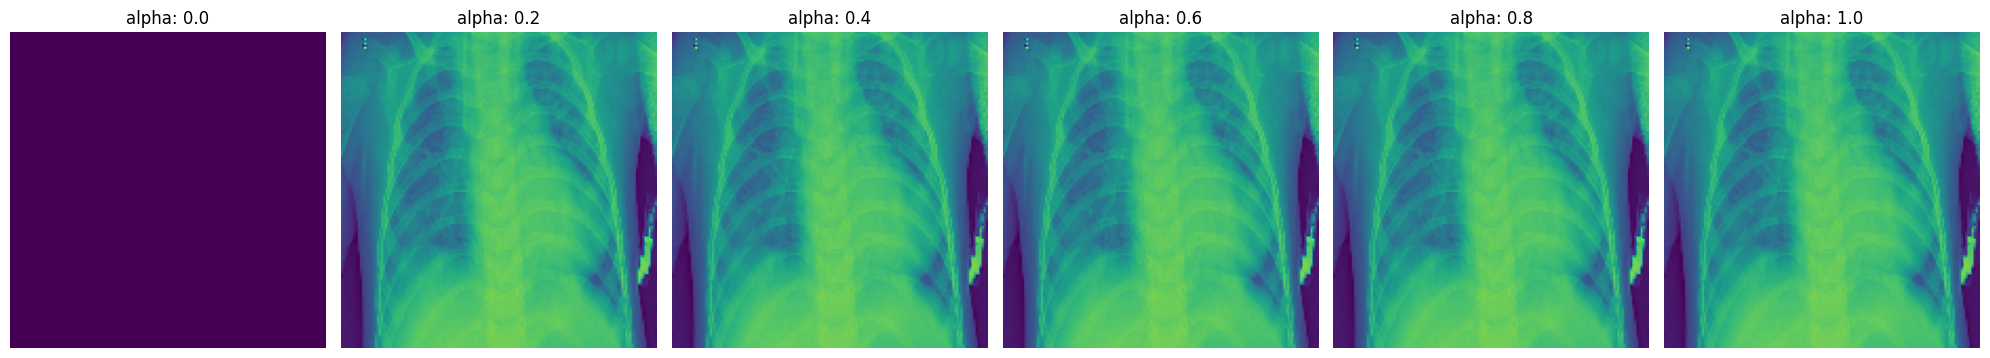

In [190]:
fig = plt.figure(figsize=(20, 20))

i = 0
for alpha, image in zip(alphas[0::10], interpolated_img[0::10]):
  i += 1
  plt.subplot(1, len(alphas[0::10]), i)
  plt.title(f'alpha: {alpha:.1f}')
  plt.imshow(image)
  plt.axis('off')

plt.tight_layout();

### Integrated Gradients
$IntegratedGrads^{approx}_{i}(x)::=\overbrace{(x_{i}-x'_{i})}^\text{5.}\times \overbrace{\sum_{k=1}^{m} }^\text{4.} \frac{\partial \overbrace{F(\overbrace{x' + \overbrace{\frac{k}{m} }^\text{1.}\times(x - x'))}^\text{2.} }^\text{3.} }{\partial x_{i} } \times \overbrace{\frac{1}{m} }^\text{4.}$

1. Generate alphas $\alpha$

2. Generate interpolated images = $(x' + \frac{k}{m}\times(x - x'))$

3. Compute gradients between model output predictions with respect to input features = $\frac{\partial F(\text{interpolated path inputs})}{\partial x_{i} }$

4. Integral approximation through averaging gradients = $\sum_{k=1}^m \text{gradients} \times \frac{1}{m}$

5. Scale integrated gradients with respect to original image = $(x_{i}-x'_{i}) \times \text{integrated gradients}$
. The reason this step is necessary is to make sure that the attribution values accumulated across multiple interpolated images are in the same units and faithfully represent the pixel importances on the original image.

In [191]:
# define model
model = pneumonia_clf

# compute gradients
def compute_gradients(images, target_class_idx):
  with tf.GradientTape() as tape:
    tape.watch(images)
    logits = model(images)
    probs = tf.nn.softmax(logits, axis=-1)[:, target_class_idx]
  return tape.gradient(probs, images)

In [192]:
path_gradients = compute_gradients(interpolated_img, target_class_idx=0)

In [193]:
print(path_gradients.shape)

(51, 150, 150, 1)


In [194]:
# accumulate gradients
def integral_approximation(gradients):
  # riemann_trapezoidal
  grads = (gradients[:-1] + gradients[1:]) / tf.constant(2.0)
  integrated_gradients = tf.math.reduce_mean(grads, axis=0)
  return integrated_gradients

In [195]:
ig = integral_approximation(path_gradients)

In [196]:
print(ig.shape)

(150, 150, 1)


In [197]:
def integrated_gradients(baseline,
                         image,
                         target_class_idx,
                         m_steps=50,
                         batch_size=32):
  # convert to float32 for numerical stability
  baseline = tf.cast(baseline, tf.float32)
  image = tf.cast(image, tf.float32)

  # Generate alphas.
  alphas = tf.linspace(start=0.0, stop=1.0, num=m_steps+1)

  # Collect gradients.    
  gradient_batches = []

  # Iterate alphas range and batch computation for speed, memory efficiency, and scaling to larger m_steps.
  for alpha in tf.range(0, len(alphas), batch_size):
    from_ = alpha
    to = tf.minimum(from_ + batch_size, len(alphas))
    alpha_batch = alphas[from_:to]

    gradient_batch = one_batch(baseline, image, alpha_batch, target_class_idx)
    gradient_batches.append(gradient_batch)

  # Concatenate path gradients together row-wise into single tensor.
  total_gradients = tf.concat(gradient_batches, axis=0)

  # Integral approximation through averaging gradients.
  avg_gradients = integral_approximation(gradients=total_gradients)

  # Scale integrated gradients with respect to input.
  integrated_gradients = (image - baseline) * avg_gradients

  return integrated_gradients

@tf.function
def one_batch(baseline, image, alpha_batch, target_class_idx):
    # Generate interpolated inputs between baseline and input.
    interpolated_path_input_batch = interpolate_images(baseline=baseline,
                                                       image=image,
                                                       alphas=alpha_batch)

    # Compute gradients between model outputs and interpolated inputs.
    gradient_batch = compute_gradients(images=interpolated_path_input_batch,
                                       target_class_idx=target_class_idx)
    return gradient_batch

In [198]:
ig_attributions = integrated_gradients(baseline=baseline,
                                        image=x_test[0],
                                        target_class_idx=0,
                                        m_steps=50,
                                        batch_size=32)

Baseline shape:  (1, 150, 150, 1)
Image shape:  (1, 150, 150, 1)
Alphas shape:  (32, 1, 1, 1)
Baseline shape:  (1, 150, 150, 1)
Image shape:  (1, 150, 150, 1)
Alphas shape:  (19, 1, 1, 1)


In [199]:
print(ig_attributions.shape)

(150, 150, 1)


In [200]:
# visualize attributions (baseline, original, attributions, and overlay)
def visualize(img, attributions, alpha=0.4):
    fig, ax = plt.subplots(1, 4, figsize=(20, 20))
    ax[0].imshow(baseline)
    ax[0].set_title("Baseline")
    ax[0].axis('off')
    ax[1].imshow(img)
    ax[1].set_title("Original")
    ax[1].axis('off')
    ax[2].imshow(attributions)
    ax[2].set_title("Attributions")
    ax[2].axis('off')
    ax[3].imshow(img)
    ax[3].imshow(attributions, alpha=alpha)
    ax[3].set_title("Overlay")
    ax[3].axis('off')
    plt.tight_layout()
    plt.show()

In [201]:
# choose five random healthy and pneumonia images
healthy = np.random.choice(np.where(y_test == 0)[0], 5)
pneumonia = np.random.choice(np.where(y_test == 1)[0], 5)

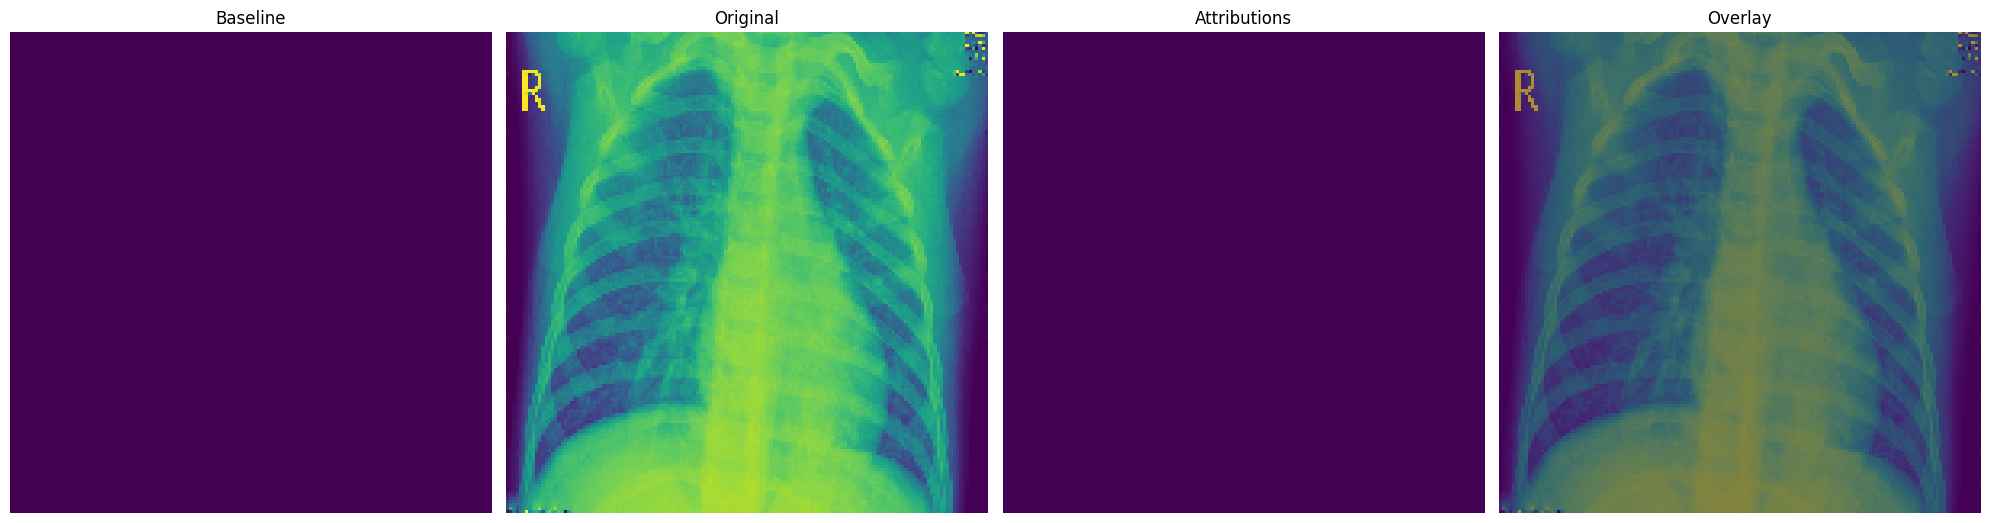

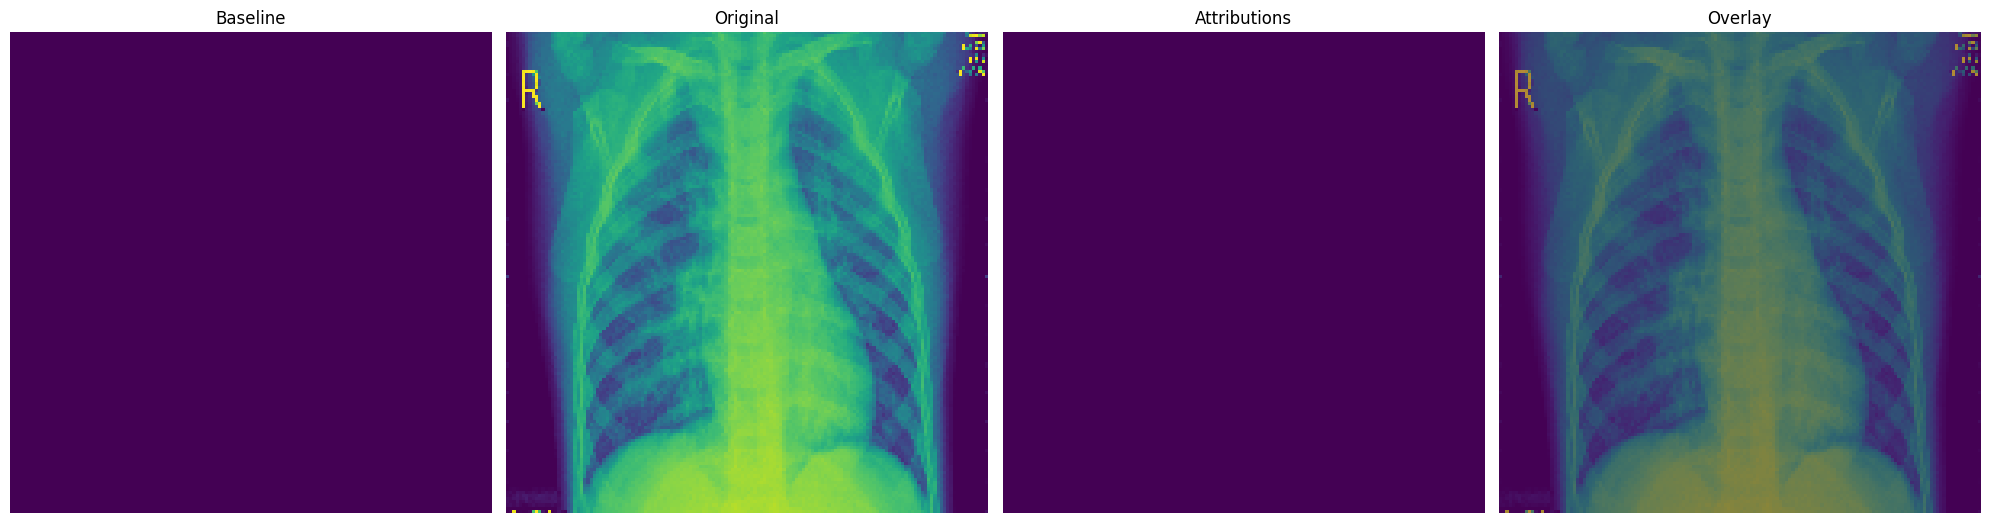

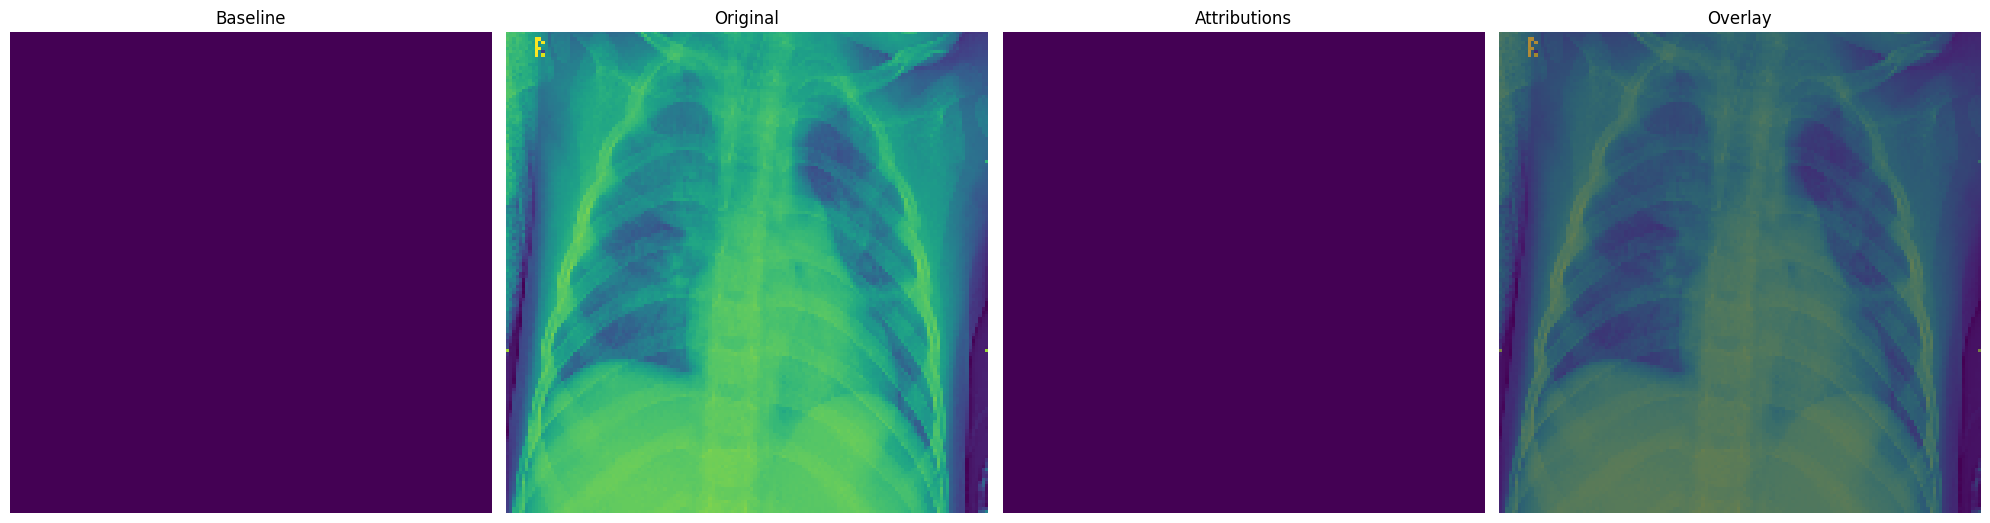

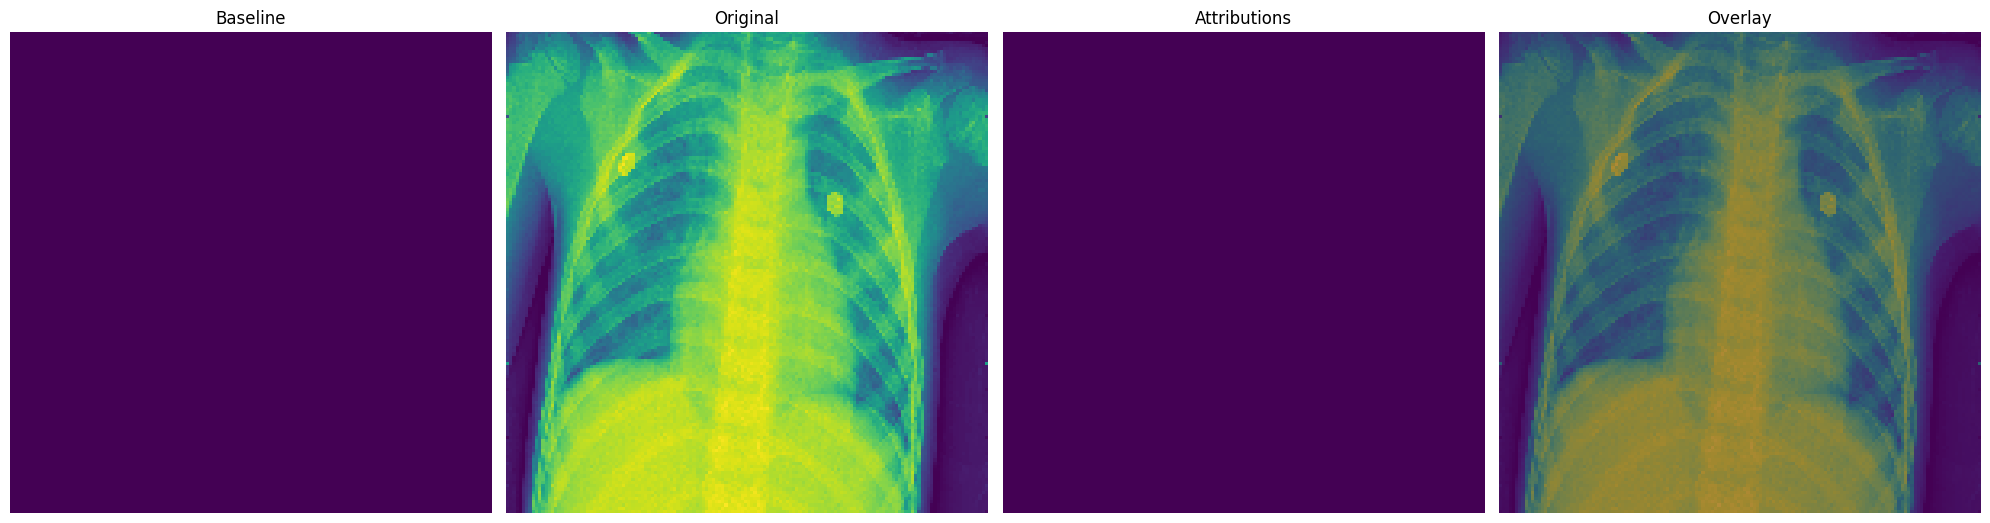

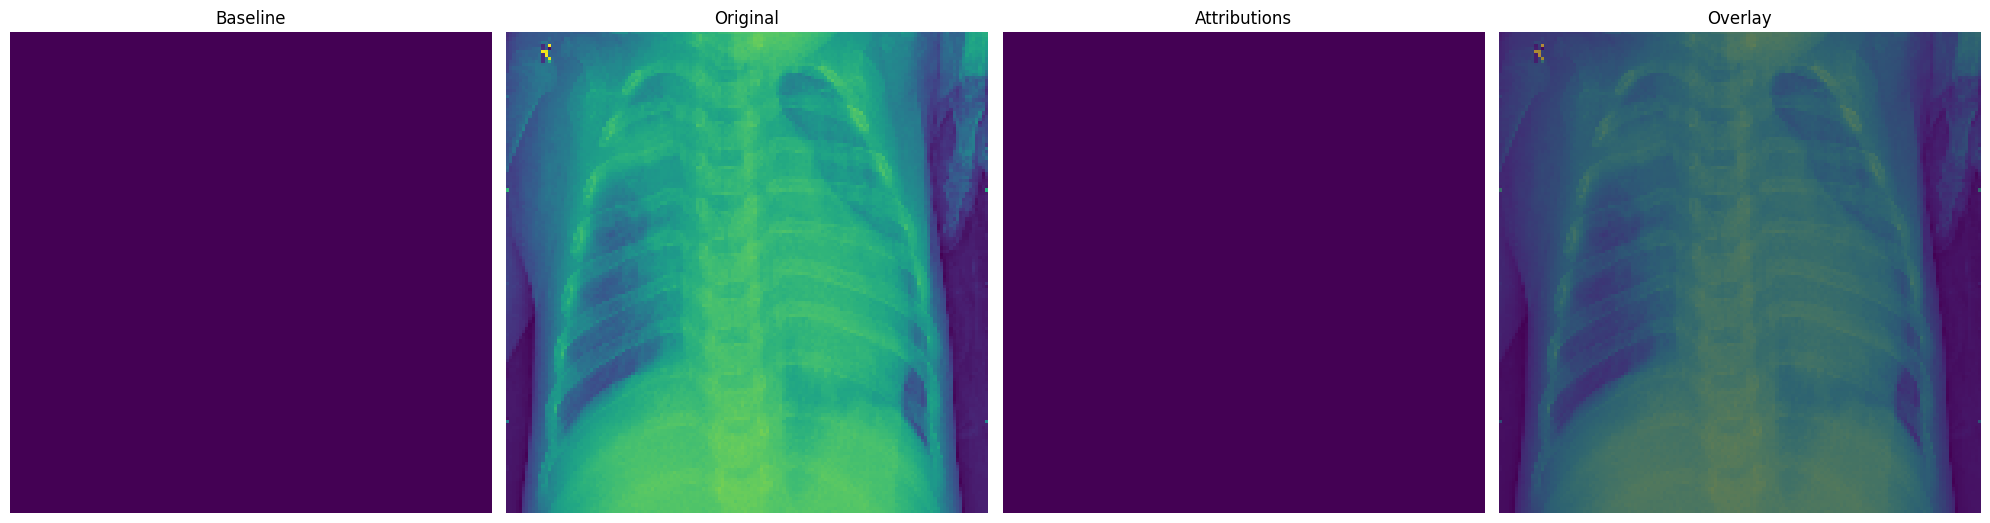

In [202]:
# integrated gradient method
# select healthy images
for i in healthy:
    ig_attributions = integrated_gradients(baseline=baseline,
                                            image=x_test[i],
                                            target_class_idx=0,
                                            m_steps=50,
                                            batch_size=32)
    visualize(x_test[i], ig_attributions)

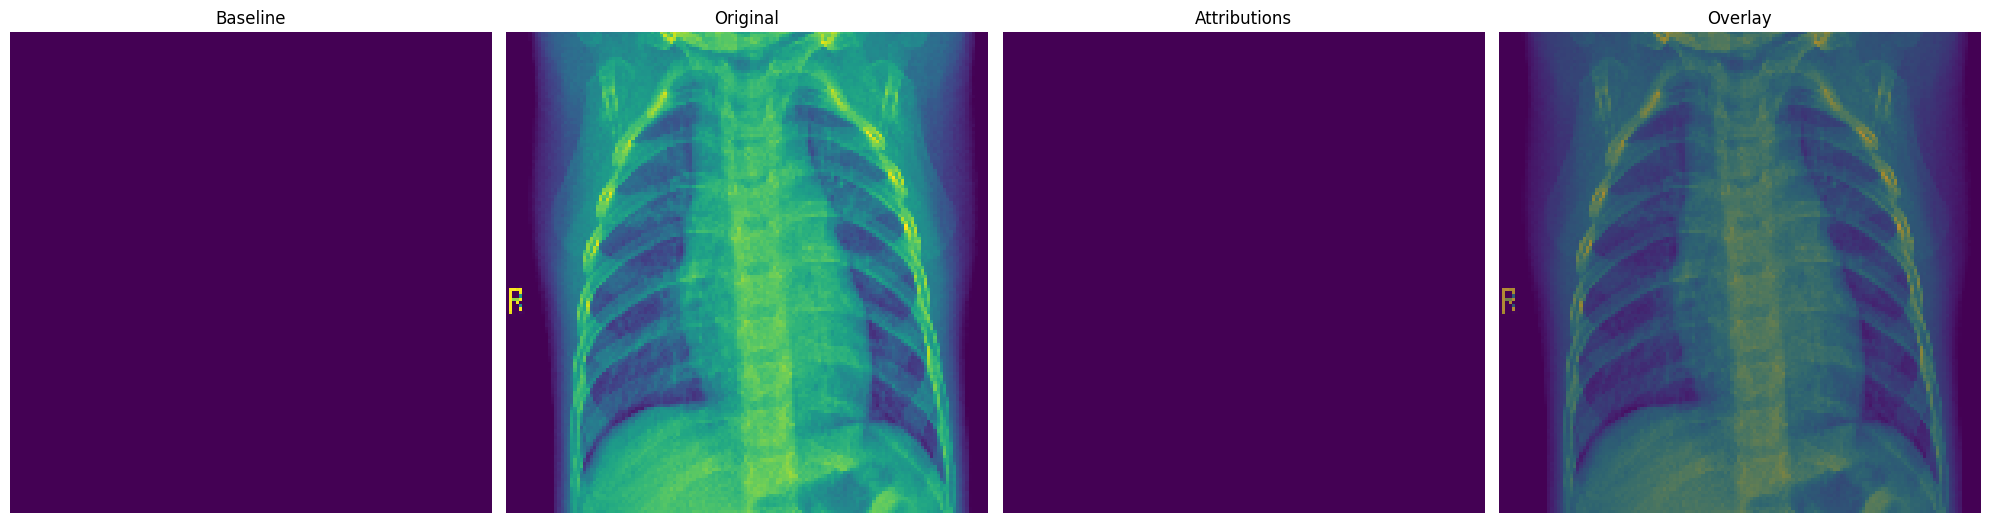

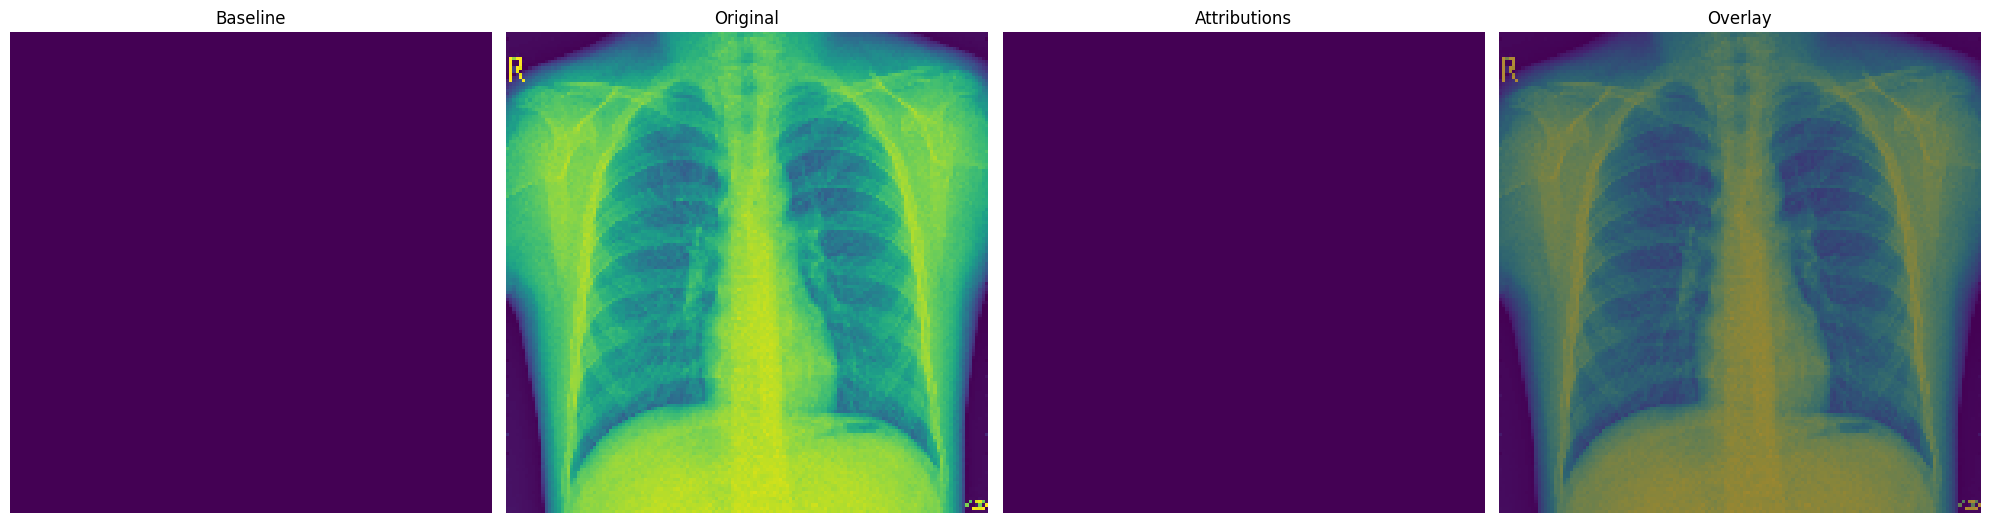

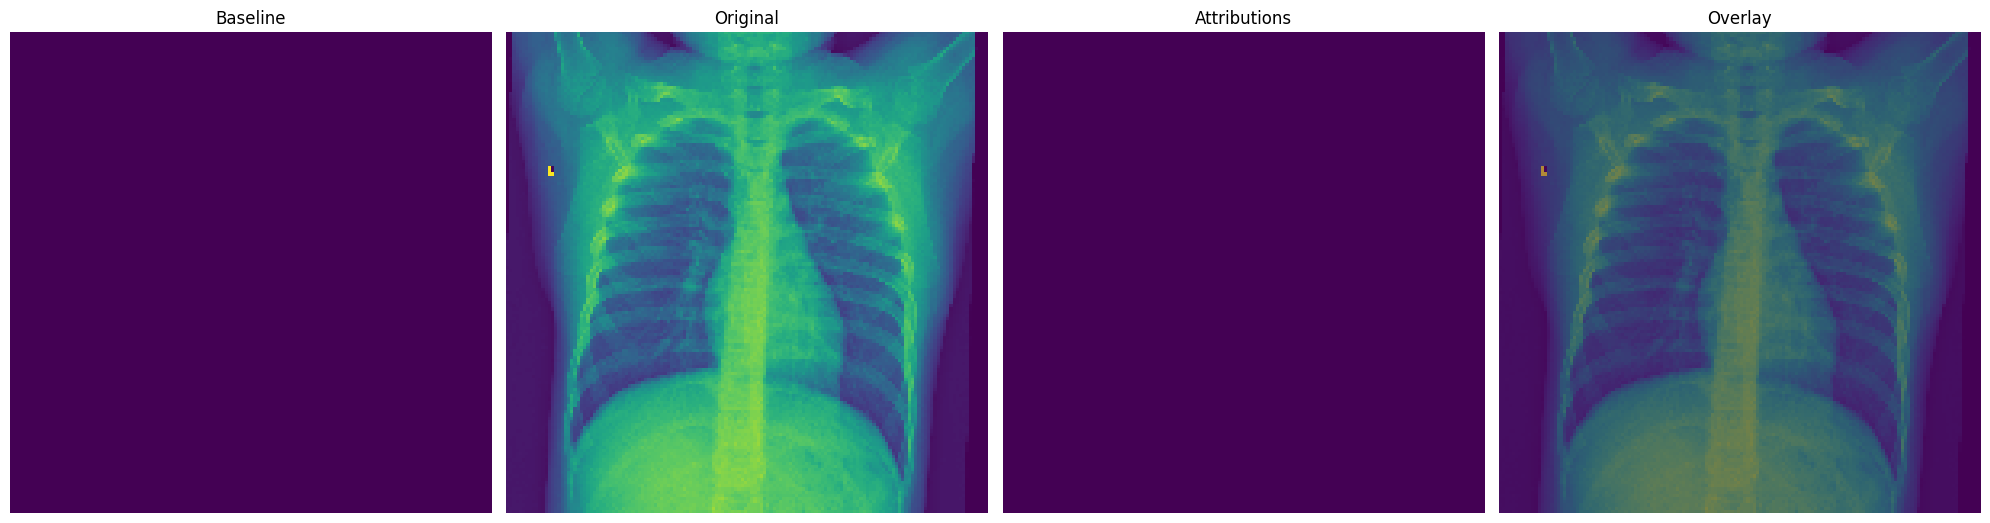

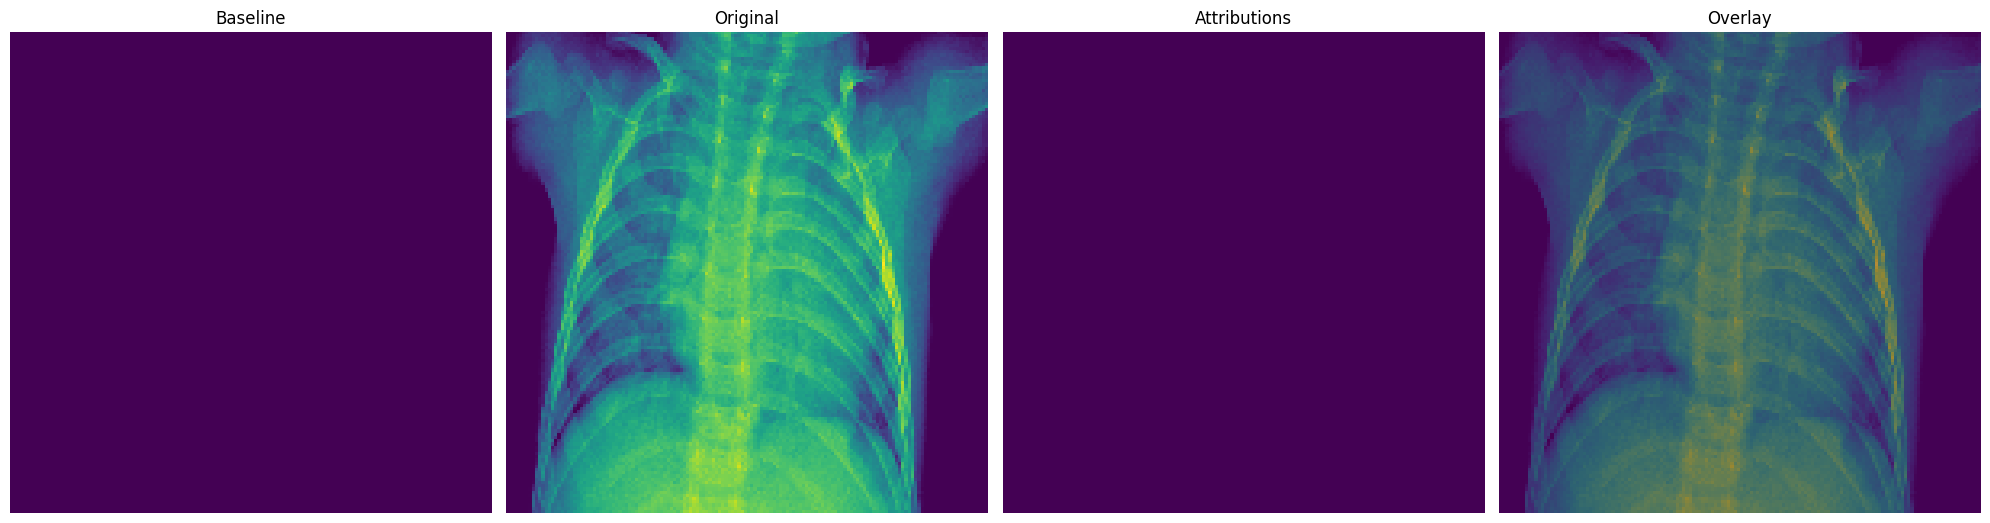

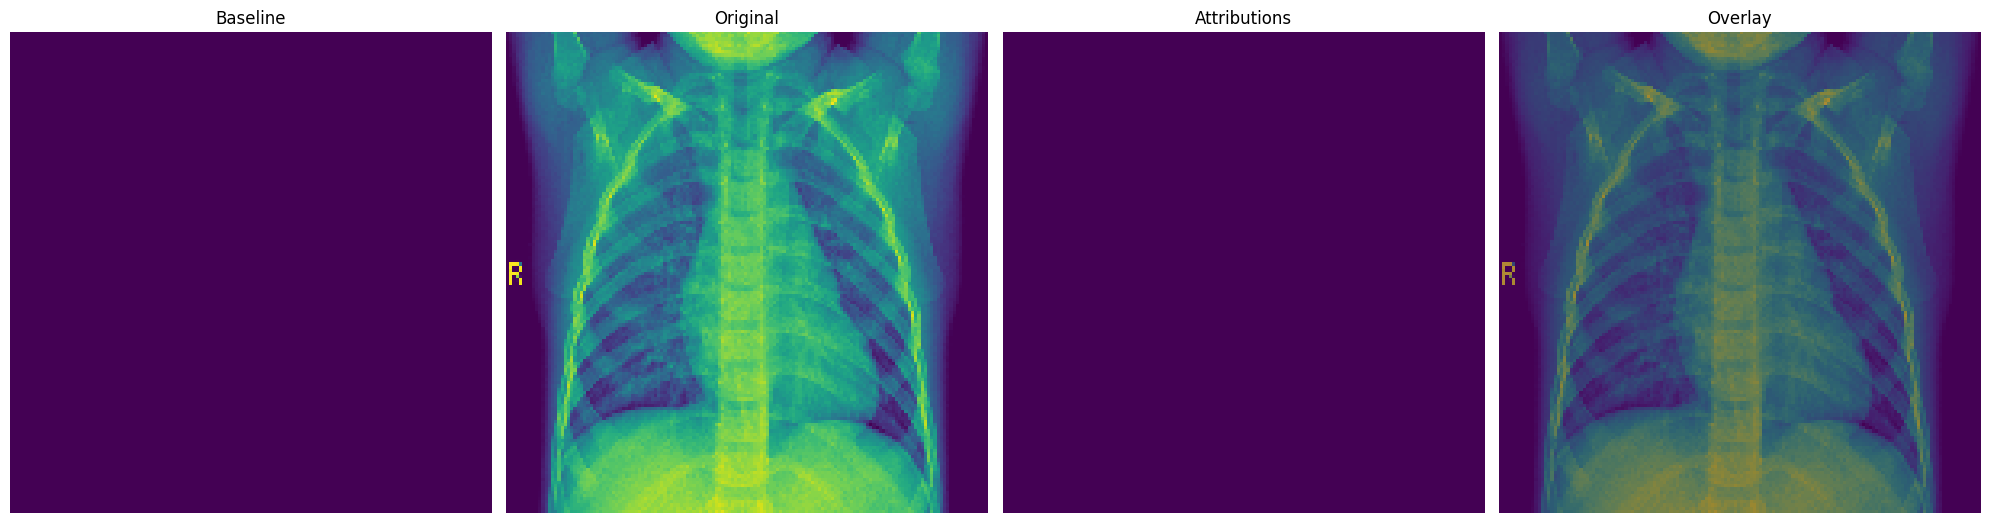

In [203]:
# select pneumonia images
for i in pneumonia:
    ig_attributions = integrated_gradients(baseline=baseline,
                                            image=x_test[i],
                                            target_class_idx=0,
                                            m_steps=50,
                                            batch_size=32)
    visualize(x_test[i], ig_attributions)

### Original IG model

In [127]:
# integrated gradient method by Sundararajan et al. (2017)
def integrated_gradients(baseline,
                         image,
                         target_class_idx,
                         m_steps=50,
                         batch_size=32):
  # convert to float32 for numerical stability
  baseline = tf.cast(baseline, tf.float32)
  image = tf.cast(image, tf.float32)

  # Generate alphas.
  alphas = tf.linspace(start=0.0, stop=1.0, num=m_steps+1)

  # Collect gradients.    
  gradient_batches = []

  # Iterate alphas range and batch computation for speed, memory efficiency, and scaling to larger m_steps.
  for alpha in tf.range(0, len(alphas), batch_size):
    from_ = alpha
    to = tf.minimum(from_ + batch_size, len(alphas))
    alpha_batch = alphas[from_:to]

    gradient_batch = one_batch(baseline, image, alpha_batch, target_class_idx)
    gradient_batches.append(gradient_batch)

  # Concatenate path gradients together row-wise into single tensor.
  total_gradients = tf.concat(gradient_batches, axis=0)

  # Integral approximation through averaging gradients.
  avg_gradients = integral_approximation(gradients=total_gradients)

  # Scale integrated gradients with respect to input.
  integrated_gradients = (image - baseline) * avg_gradients

  return integrated_gradients

In [ ]:
ig = integrated_gradients(baseline=baseline,
                            image=x_test[0],
                            target_class_idx=0,
                            m_steps=50,
                            batch_size=32)

In [ ]:
from captum.attr import IntegratedGradients
import torch
# defining model input tensors
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input = torch.tensor(x_test[0]).unsqueeze(0).to(device)
baseline = torch.tensor(baseline).unsqueeze(0).to(device)

# defining the model
model = model.to(device)
model.eval()